In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt # for plots
import seaborn as sns
%matplotlib inline

In [3]:
#fetching data from S&P 500 index using yfinance api
sp500_df = yf.download('^GSPC', start = datetime.datetime(1994, 7, 9), end = datetime.datetime(2024, 7, 9))

[*********************100%%**********************]  1 of 1 completed


In [9]:
#creating test and train datasets
train, test = sp500_df['Adj Close'][:2012], sp500_df['Adj Close'][2012:]

In [14]:
from prophet import Prophet

# Prepare the DataFrame for Prophet
df_prophet = sp500_df[["Close"]].copy()
df_prophet["Date"] = sp500_df.index
df_prophet = df_prophet.rename(columns={"Close": "y", "Date": "ds"})

# Display the first few rows to confirm the structure
df_prophet.head()

,y,ds
Date,,
1994-07-11,448.059998,1994-07-11
1994-07-12,447.950012,1994-07-12
1994-07-13,448.730011,1994-07-13
1994-07-14,453.410004,1994-07-14
1994-07-15,454.160004,1994-07-15


23:08:30 - cmdstanpy - INFO - Chain [1] start processing
23:08:32 - cmdstanpy - INFO - Chain [1] done processing


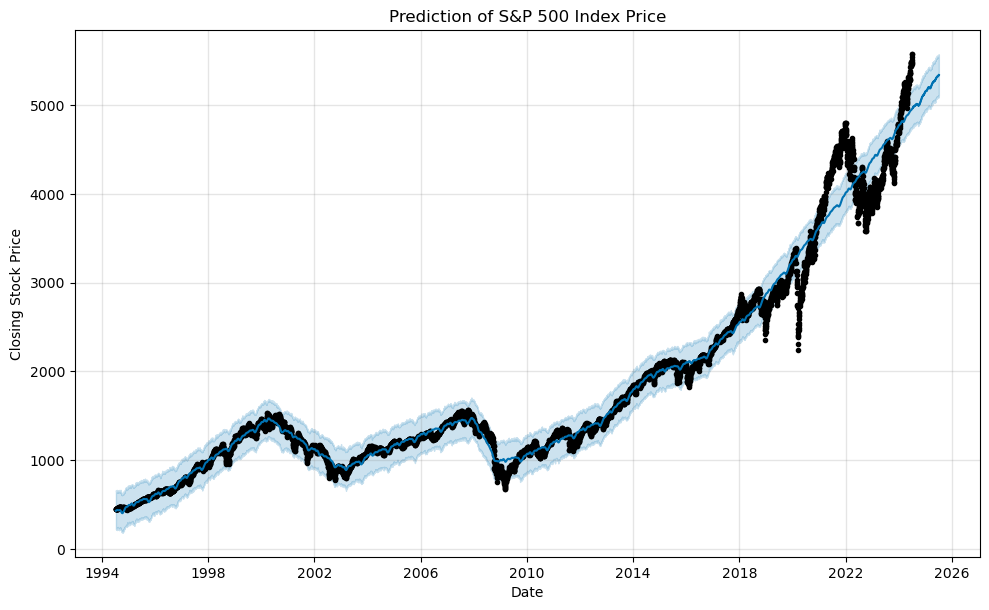

In [18]:
# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Create a DataFrame to hold predictions
future = model.make_future_dataframe(periods=365)

# Make predictions
predictions=model.predict(future)

# Plot the predictions
fig1 = model.plot(predictions)
plt.title("Prediction of S&P 500 Index Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

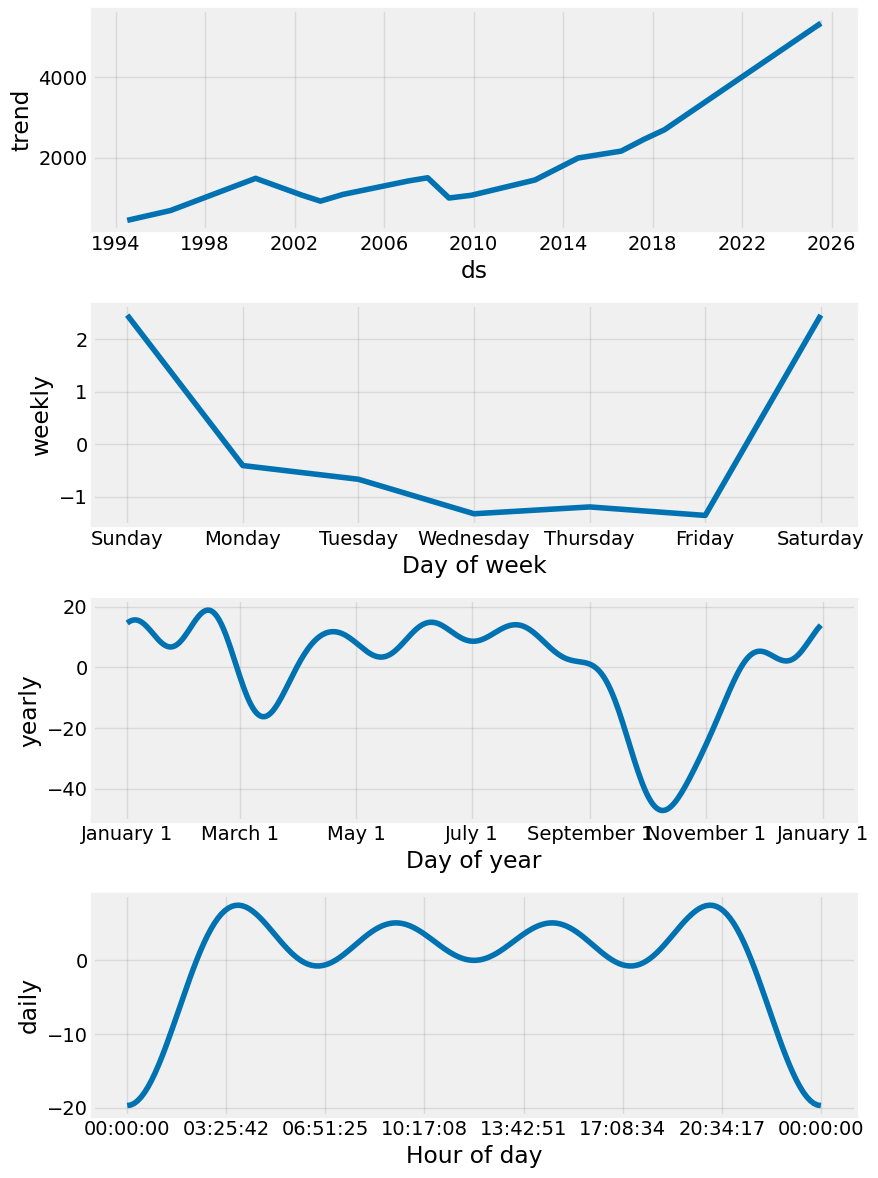

In [59]:
# Plot the forecast components
fig2 = model.plot_components(predictions)
plt.show()

In [60]:
# Display the last 10 predictions
predictions[['ds', 'yhat']][-10:]

,ds,yhat
7906,2025-06-29,5330.240962
7907,2025-06-30,5328.298803
7908,2025-07-01,5329.015489
7909,2025-07-02,5329.393617
7910,2025-07-03,5330.613981
7911,2025-07-04,5331.597031
7912,2025-07-05,5336.605553
7913,2025-07-06,5337.849382
7914,2025-07-07,5336.273136
7915,2025-07-08,5337.337277


In [7]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Train-Test Split
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]

# Fit the model on the training data
model = Prophet(daily_seasonality=True)
model.fit(train_df)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

# Extract the test predictions
test_forecast = forecast[['ds', 'yhat']].iloc[train_size:]

# Evaluate the performance on the test set
y_true = test_df['y'].values
y_pred = test_forecast['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("\n \n- For Prophet Model : ")
print(f"\nMean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}\n \n")


23:04:21 - cmdstanpy - INFO - Chain [1] start processing
23:04:24 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'mean_absolute_error' is not defined

  0%|          | 0/43 [00:00<?, ?it/s]

23:04:33 - cmdstanpy - INFO - Chain [1] start processing
23:04:33 - cmdstanpy - INFO - Chain [1] done processing
23:04:33 - cmdstanpy - INFO - Chain [1] start processing
23:04:33 - cmdstanpy - INFO - Chain [1] done processing
23:04:33 - cmdstanpy - INFO - Chain [1] start processing
23:04:33 - cmdstanpy - INFO - Chain [1] done processing
23:04:33 - cmdstanpy - INFO - Chain [1] start processing
23:04:34 - cmdstanpy - INFO - Chain [1] done processing
23:04:34 - cmdstanpy - INFO - Chain [1] start processing
23:04:34 - cmdstanpy - INFO - Chain [1] done processing
23:04:34 - cmdstanpy - INFO - Chain [1] start processing
23:04:35 - cmdstanpy - INFO - Chain [1] done processing
23:04:35 - cmdstanpy - INFO - Chain [1] start processing
23:04:35 - cmdstanpy - INFO - Chain [1] done processing
23:04:35 - cmdstanpy - INFO - Chain [1] start processing
23:04:36 - cmdstanpy - INFO - Chain [1] done processing
23:04:36 - cmdstanpy - INFO - Chain [1] start processing
23:04:36 - cmdstanpy - INFO - Chain [1]


 
 
      horizon           mse        rmse         mae      mape     mdape  \
0    37 days  20243.762543  142.280577   97.698809  0.081762  0.046350   
1    38 days  20363.964318  142.702363   98.401940  0.082260  0.046705   
2    39 days  20428.047687  142.926721   98.941659  0.082649  0.046744   
3    40 days  20461.628329  143.044148   99.271991  0.082854  0.047690   
4    41 days  20420.365361  142.899844   99.746686  0.083075  0.049174   
..       ...           ...         ...         ...       ...       ...   
324 361 days  79805.695594  282.499019  221.141189  0.177925  0.114288   
325 362 days  80594.708442  283.892072  222.144477  0.179010  0.115170   
326 363 days  81509.502282  285.498691  223.499230  0.180246  0.115830   
327 364 days  82180.264285  286.671004  224.499430  0.181201  0.115498   
328 365 days  82752.136808  287.666711  225.450006  0.181776  0.115830   

        smape  coverage  
0    0.080384  0.395930  
1    0.080899  0.389932  
2    0.081339  0.386589  
3

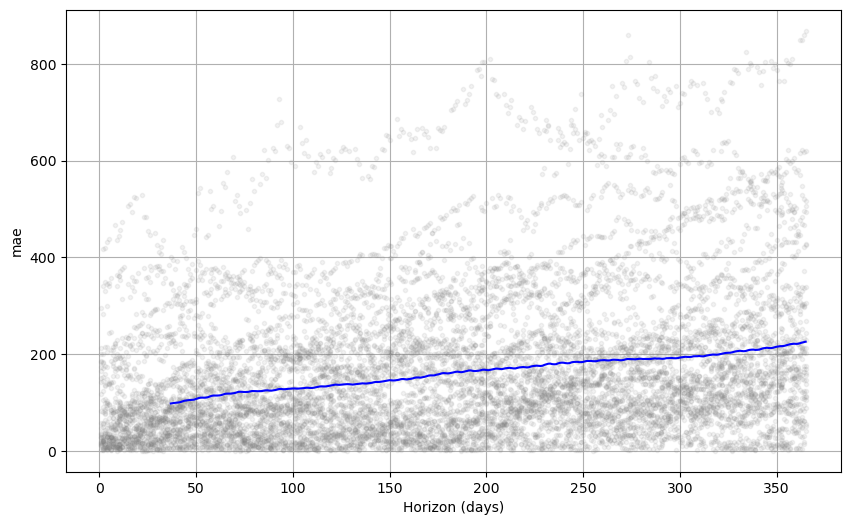

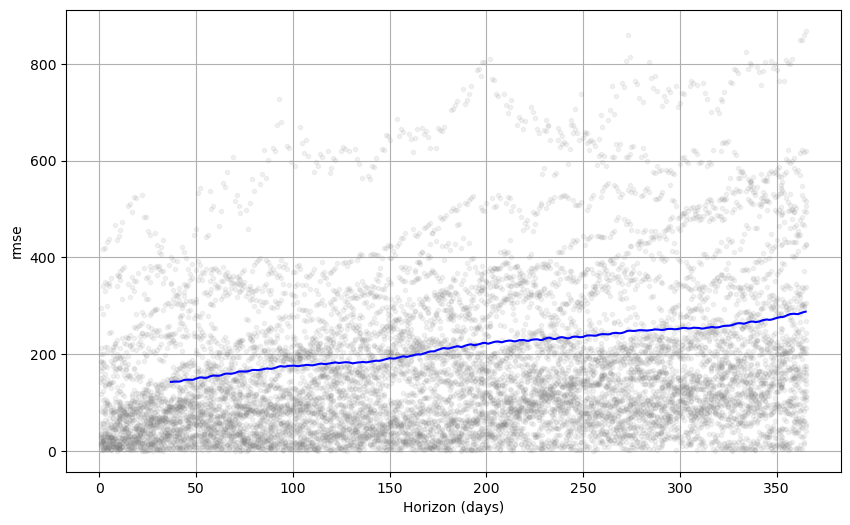

In [8]:
# Cross-Validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_performance = performance_metrics(df_cv)

print("\n \n \n", df_performance)
print("\n \n \n")

# Plot cross-validation performance
fig_mae = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

fig_rmse = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()